# 1 Pakete importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stargazer.stargazer import Stargazer
import statsmodels.formula.api as smf 
import statsmodels.api as sm
%matplotlib inline
import warnings
from scipy.stats import linregress
from scipy import stats


# 2 CSV-Dateien einlesen

In [2]:
csv_1 = "data/kunden.csv"
csv_2 = "data/besucher.csv"

In [3]:
df_1 = pd.read_csv(csv_1, sep = ";")
df_2 = pd.read_csv(csv_2, sep = ";")

In [4]:
df_1

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1.0,43.0,K0310
1,54,77644.0,103145.70,1.0,40.0,K1042
2,55,44341.0,80565.16,0.0,37.0,K0382
3,49,67271.0,83949.89,0.0,42.0,K0498
4,46,49832.0,93781.58,0.0,41.0,K0552
...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467
1100,38,48301.0,64230.98,1.0,33.0,K0122
1101,67,63547.0,103123.57,1.0,41.0,K1045
1102,37,32686.0,49215.87,1.0,36.0,K1096


In [5]:
df_2

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,"39919,0953348874",0,"29,0",K1814
1,41,"53430,67308587748",0,"27,0",K1544
2,64,"73163,2169267002",0,"32,0",K1945
3,41,"36761,482581315344",0,"44,0",K1825
4,35,"42684,33163178136",1,"33,0",K1144
...,...,...,...,...,...
886,32,"34391,82496545645",1,"48,0",K1211
887,41,"68516,49543941053",0,"34,0",K1375
888,65,"89685,33344089528",0,"23,0",K1965
889,68,"95714,30526812703",0,"32,0",K1540


# 3 Überblick über die Datentypen verschaffen

In [6]:
df_1.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

In [7]:
df_2.dtypes

Alter          int64
Einkommen     object
Geschlecht     int64
Zeit          object
KundeNr       object
dtype: object

Zu ändern sind später: Einkommen --> float; Geschlecht --> int; Zeit --> float

# 4.1 df_1 Geschlecht

In [8]:
df_1.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    5
Zeit          0
KundeNr       0
dtype: int64

In [9]:
df_1["Geschlecht"] = df_1["Geschlecht"].fillna(1) # Für 1 (Männlich) entschieden, da die meisten Ausprägungen 1 waren
df_1.isna().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64

# df_1 Einkommen

In [10]:
df_1["Einkommen"].mean()

964474.8175955408

In [11]:
Q1 = df_1["Einkommen"].quantile(0.25)
Q3 = df_1["Einkommen"].quantile(0.75)
IQR = Q3 - Q1

In [12]:
Q1

46638.5

In [13]:
Q3

70298.0

In [14]:
IQR

23659.5

In [15]:
median_einkommen = df_1["Einkommen"].median()
median_einkommen

59013.0

In [16]:
df_1["Einkommen"] = df_1["Einkommen"].apply(lambda x: median_einkommen if x <= 0 or x >= 1000000 else x)

In [17]:
df_1.describe()

,Alter,Einkommen,Preis,Geschlecht,Zeit
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,50.481884,58894.998188,88975.198714,0.639493,44.375906
std,12.225059,16509.072600,24464.067781,0.480365,10.848040
min,30.000000,14547.000000,21471.650000,0.000000,12.000000
25%,40.000000,46697.000000,70609.422500,0.000000,37.000000
50%,51.000000,59013.000000,88931.455000,1.000000,44.000000
75%,61.000000,70281.750000,107093.375000,1.000000,52.000000
max,120.000000,107689.000000,165482.310000,1.000000,80.000000


# df_1 Alter 

In [18]:
df_1["Alter"].value_counts()

Alter
55     41
62     39
57     34
66     33
64     32
30     32
34     31
69     30
37     30
31     30
52     29
54     29
58     29
65     29
53     29
61     29
68     29
59     28
35     27
51     27
41     26
40     26
43     26
32     26
46     26
39     24
48     24
38     24
33     24
44     23
50     23
67     23
42     22
70     22
56     22
45     22
49     22
63     21
60     20
47     20
36     19
100     1
120     1
Name: count, dtype: int64

In [19]:
modalwert_alter = df_1["Alter"].mode()[0]
modalwert_alter

55

In [20]:
anzahl_personen_ueber_70 = len(df_1[df_1["Alter"] > 70])

In [21]:
anzahl_personen_ueber_70

2

In [22]:
df_1["Alter"] = df_1["Alter"].apply(lambda x: modalwert_alter if x >= 100 else x)

In [23]:
df_1.describe()

,Alter,Einkommen,Preis,Geschlecht,Zeit
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,50.382246,58894.998188,88975.198714,0.639493,44.375906
std,11.953017,16509.072600,24464.067781,0.480365,10.848040
min,30.000000,14547.000000,21471.650000,0.000000,12.000000
25%,40.000000,46697.000000,70609.422500,0.000000,37.000000
50%,51.000000,59013.000000,88931.455000,1.000000,44.000000
75%,61.000000,70281.750000,107093.375000,1.000000,52.000000
max,70.000000,107689.000000,165482.310000,1.000000,80.000000


# 4.2 df_1 Daten umformen

In [24]:
df_1["Geschlecht"] = df_1["Geschlecht"].astype("int64")

In [25]:
df_1.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht      int64
Zeit          float64
KundeNr        object
dtype: object

In [26]:
df_1.describe()

,Alter,Einkommen,Preis,Geschlecht,Zeit
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,50.382246,58894.998188,88975.198714,0.639493,44.375906
std,11.953017,16509.072600,24464.067781,0.480365,10.848040
min,30.000000,14547.000000,21471.650000,0.000000,12.000000
25%,40.000000,46697.000000,70609.422500,0.000000,37.000000
50%,51.000000,59013.000000,88931.455000,1.000000,44.000000
75%,61.000000,70281.750000,107093.375000,1.000000,52.000000
max,70.000000,107689.000000,165482.310000,1.000000,80.000000


# 5  df_2 Daten umformen

In [27]:
df_2["Einkommen"] = pd.to_numeric(df_2["Einkommen"].str.replace(',', '.'), errors="coerce")

In [28]:
df_2["Zeit"] = pd.to_numeric(df_2["Zeit"].str.replace(',', '.'), errors="coerce")

In [29]:
df_2.dtypes

Alter           int64
Einkommen     float64
Geschlecht      int64
Zeit          float64
KundeNr        object
dtype: object

In [30]:
df_2.describe()

,Alter,Einkommen,Geschlecht,Zeit
count,891.000000,891.000000,891.000000,891.000000
mean,49.881033,59367.936188,0.578002,35.166105
std,11.865889,16164.358221,0.494156,10.476802
min,30.000000,10802.033307,0.000000,3.000000
25%,40.000000,47816.611417,0.000000,28.000000
50%,49.000000,59163.823681,1.000000,35.000000
75%,60.000000,71001.378839,1.000000,43.000000
max,70.000000,108569.087021,1.000000,68.000000


# 6 Zusammenfügen von df_1 und df_2 zu df_3

In [31]:
df_3 = pd.concat([df_1, df_2],
                axis = 0, # Über die Zeilen zusammenfügen
                ignore_index = True)

In [32]:
df_3

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.000000,88160.31,1,43.0,K0310
1,54,77644.000000,103145.70,1,40.0,K1042
2,55,44341.000000,80565.16,0,37.0,K0382
3,49,67271.000000,83949.89,0,42.0,K0498
4,46,49832.000000,93781.58,0,41.0,K0552
...,...,...,...,...,...,...
1990,32,34391.824965,NaN,1,48.0,K1211
1991,41,68516.495439,NaN,0,34.0,K1375
1992,65,89685.333441,NaN,0,23.0,K1965
1993,68,95714.305268,NaN,0,32.0,K1540


# 7 Einkommen runden

In [33]:
df_3["Einkommen"] = df_3["Einkommen"].round(2)
df_3

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.00,88160.31,1,43.0,K0310
1,54,77644.00,103145.70,1,40.0,K1042
2,55,44341.00,80565.16,0,37.0,K0382
3,49,67271.00,83949.89,0,42.0,K0498
4,46,49832.00,93781.58,0,41.0,K0552
...,...,...,...,...,...,...
1990,32,34391.82,NaN,1,48.0,K1211
1991,41,68516.50,NaN,0,34.0,K1375
1992,65,89685.33,NaN,0,23.0,K1965
1993,68,95714.31,NaN,0,32.0,K1540


# 8.1 Textdatei einlesen

In [34]:
text_datei = "data/geo.txt"
df_text = pd.read_csv(text_datei, header=None, names=["Platzhalter"])
df_text

,Platzhalter
0,KundeNr\tNiederlassung
1,K0001\tSachsen
2,K0002\tNRW
3,K0003\tHessen
4,K0004\tBayern
...,...
1991,K1991\tHessen
1992,K1992\tBaden-Württemberg
1993,K1993\tNordrhein-Westfalen
1994,K1994\tBerlin


# 8.2 Überschriften 

In [35]:
df_text[["KundeNR", "Niederlassung"]] = df_text["Platzhalter"].str.split(expand=True)
df_text

,Platzhalter,KundeNR,Niederlassung
0,KundeNr\tNiederlassung,KundeNr,Niederlassung
1,K0001\tSachsen,K0001,Sachsen
2,K0002\tNRW,K0002,NRW
3,K0003\tHessen,K0003,Hessen
4,K0004\tBayern,K0004,Bayern
...,...,...,...
1991,K1991\tHessen,K1991,Hessen
1992,K1992\tBaden-Württemberg,K1992,Baden-Württemberg
1993,K1993\tNordrhein-Westfalen,K1993,Nordrhein-Westfalen
1994,K1994\tBerlin,K1994,Berlin


In [36]:
df_text

,Platzhalter,KundeNR,Niederlassung
0,KundeNr\tNiederlassung,KundeNr,Niederlassung
1,K0001\tSachsen,K0001,Sachsen
2,K0002\tNRW,K0002,NRW
3,K0003\tHessen,K0003,Hessen
4,K0004\tBayern,K0004,Bayern
...,...,...,...
1991,K1991\tHessen,K1991,Hessen
1992,K1992\tBaden-Württemberg,K1992,Baden-Württemberg
1993,K1993\tNordrhein-Westfalen,K1993,Nordrhein-Westfalen
1994,K1994\tBerlin,K1994,Berlin


In [37]:
df_text.columns

Index(['Platzhalter', 'KundeNR', 'Niederlassung'], dtype='object')

In [38]:
df_text = df_text.drop("Platzhalter", axis=1)


df_text.columns

# 9 Im df_3 neue Spalte erstellen

In [39]:
df_3 = df_3.copy()
df_3["Niederlassung"] = None
df_3

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.00,88160.31,1,43.0,K0310,None
1,54,77644.00,103145.70,1,40.0,K1042,None
2,55,44341.00,80565.16,0,37.0,K0382,None
3,49,67271.00,83949.89,0,42.0,K0498,None
4,46,49832.00,93781.58,0,41.0,K0552,None
...,...,...,...,...,...,...,...
1990,32,34391.82,NaN,1,48.0,K1211,None
1991,41,68516.50,NaN,0,34.0,K1375,None
1992,65,89685.33,NaN,0,23.0,K1965,None
1993,68,95714.31,NaN,0,32.0,K1540,None


# 10 Spalte umbenennen 

In [40]:
df_3 = df_3.rename(columns={"KundeNr": "KundeNR"})
df_3.dtypes

Alter              int64
Einkommen        float64
Preis            float64
Geschlecht         int64
Zeit             float64
KundeNR           object
Niederlassung     object
dtype: object

# 11 Text-Datei mit CSV mergen

In [41]:
merged_df = pd.merge(df_3, df_text[["KundeNR", "Niederlassung"]], on="KundeNR", how="left")
merged_df

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNR,Niederlassung_x,Niederlassung_y
0,64,66894.00,88160.31,1,43.0,K0310,None,Bayern
1,54,77644.00,103145.70,1,40.0,K1042,None,Berlin
2,55,44341.00,80565.16,0,37.0,K0382,None,Baden-Württemberg
3,49,67271.00,83949.89,0,42.0,K0498,None,Bayern
4,46,49832.00,93781.58,0,41.0,K0552,None,Hessen
...,...,...,...,...,...,...,...,...
1990,32,34391.82,NaN,1,48.0,K1211,None,Hessen
1991,41,68516.50,NaN,0,34.0,K1375,None,Sachsen
1992,65,89685.33,NaN,0,23.0,K1965,None,Bayern
1993,68,95714.31,NaN,0,32.0,K1540,None,Bayern


# 12 Spalte umbennen

In [42]:
merged_df = merged_df.rename(columns={"Niederlassung_y": "Niederlassung"})
merged_df = merged_df.drop("Niederlassung_x", axis = 1)
merged_df

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNR,Niederlassung
0,64,66894.00,88160.31,1,43.0,K0310,Bayern
1,54,77644.00,103145.70,1,40.0,K1042,Berlin
2,55,44341.00,80565.16,0,37.0,K0382,Baden-Württemberg
3,49,67271.00,83949.89,0,42.0,K0498,Bayern
4,46,49832.00,93781.58,0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1990,32,34391.82,NaN,1,48.0,K1211,Hessen
1991,41,68516.50,NaN,0,34.0,K1375,Sachsen
1992,65,89685.33,NaN,0,23.0,K1965,Bayern
1993,68,95714.31,NaN,0,32.0,K1540,Bayern


# 13 Namen der Niederlassungen anzeigen

In [43]:
merged_df["Niederlassung"].unique()

array(['Bayern', 'Berlin', 'Baden-Württemberg', 'Hessen', 'Thüringen',
       'Sachsen', 'Nordrhein-Westfalen', 'BERLIN', 'Niedersachsen',
       'Hamburg', 'Brandenburg', 'Berlin-Mitte', 'Düsseldorf', 'NRW',
       'Berlin-Charlottenburg'], dtype=object)

# 14 Namen der Bundesländer fixen

In [44]:
merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("BERLIN", "Berlin")
merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("Berlin-Mitte", "Berlin")
merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("Berlin-Charlottenburg", "Berlin")
merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("Düsseldorf", "Nordrhein-Westfalen")
merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("NRW", "Nordrhein-Westfalen")
merged_df

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNR,Niederlassung
0,64,66894.00,88160.31,1,43.0,K0310,Bayern
1,54,77644.00,103145.70,1,40.0,K1042,Berlin
2,55,44341.00,80565.16,0,37.0,K0382,Baden-Württemberg
3,49,67271.00,83949.89,0,42.0,K0498,Bayern
4,46,49832.00,93781.58,0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1990,32,34391.82,NaN,1,48.0,K1211,Hessen
1991,41,68516.50,NaN,0,34.0,K1375,Sachsen
1992,65,89685.33,NaN,0,23.0,K1965,Bayern
1993,68,95714.31,NaN,0,32.0,K1540,Bayern


In [45]:
merged_df["Niederlassung"].unique()

array(['Bayern', 'Berlin', 'Baden-Württemberg', 'Hessen', 'Thüringen',
       'Sachsen', 'Nordrhein-Westfalen', 'Niedersachsen', 'Hamburg',
       'Brandenburg'], dtype=object)

Kunden stammen aus 10 Bundesländern

# 16. 1 Neue Spalte namens "Typ" erstellen (Kunden oder Besucher)

In [46]:
merged_df["Typ"] = merged_df["Preis"].apply(lambda x: 'Kunde' if pd.notna(x) else 'Besucher')

# 16.2 Spalte umpositionieren

In [47]:
merged_df.insert(0, "Typ", merged_df.pop("Typ"))
merged_df.describe()

,Alter,Einkommen,Preis,Geschlecht,Zeit
count,1995.000000,1995.000000,1104.000000,1995.00000,1995.000000
mean,50.158396,59106.220060,88975.198714,0.61203,40.262657
std,11.913807,16353.622987,24464.067781,0.48741,11.621591
min,30.000000,10802.030000,21471.650000,0.00000,3.000000
25%,40.000000,47052.705000,70609.422500,0.00000,32.000000
50%,51.000000,59102.580000,88931.455000,1.00000,40.000000
75%,61.000000,70677.950000,107093.375000,1.00000,48.000000
max,70.000000,108569.090000,165482.310000,1.00000,80.000000


In [48]:
merged_df["Typ"].value_counts().get("Kunde")

1104

In [49]:
merged_df["Typ"].value_counts().get("Besucher")

891

# 17 CSV Speichern

In [50]:
merged_df.to_csv("data/df_final.csv", index = False)

In [51]:
df_1.to_csv("data/df_1.csv", index = False)

In [52]:
df_2.to_csv("data/df_2.csv", index = False)

In [53]:
df_3.to_csv("data/df_3.csv", index = False)

# 18 Kundennummer als Index

In [54]:
merged_df.set_index("KundeNR", inplace=True)
merged_df


,Typ,Alter,Einkommen,Preis,Geschlecht,Zeit,Niederlassung
KundeNR,,,,,,,
K0310,Kunde,64,66894.00,88160.31,1,43.0,Bayern
K1042,Kunde,54,77644.00,103145.70,1,40.0,Berlin
K0382,Kunde,55,44341.00,80565.16,0,37.0,Baden-Württemberg
K0498,Kunde,49,67271.00,83949.89,0,42.0,Bayern
K0552,Kunde,46,49832.00,93781.58,0,41.0,Hessen
...,...,...,...,...,...,...,...
K1211,Besucher,32,34391.82,NaN,1,48.0,Hessen
K1375,Besucher,41,68516.50,NaN,0,34.0,Sachsen
K1965,Besucher,65,89685.33,NaN,0,23.0,Bayern


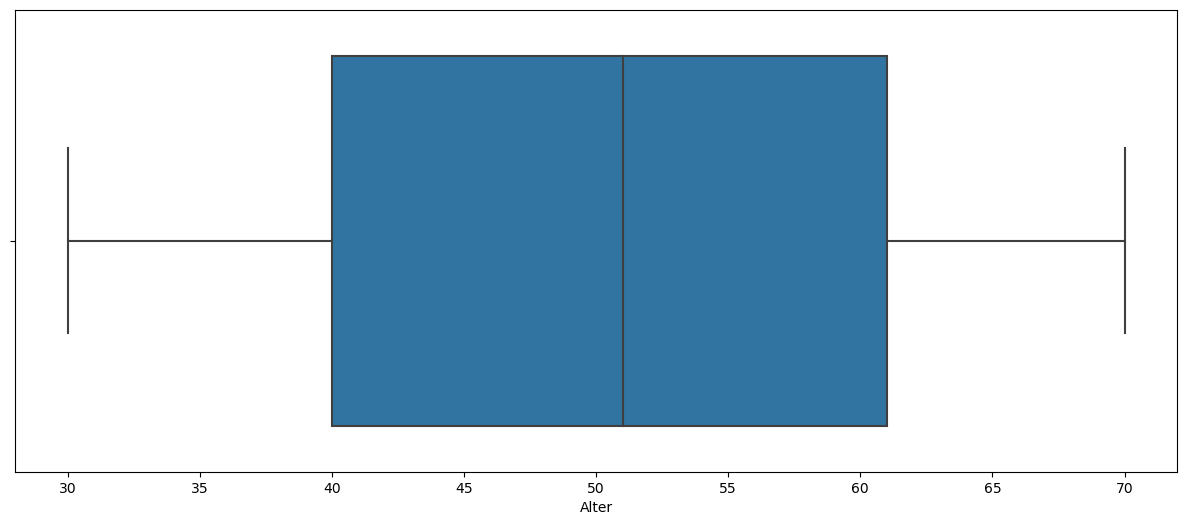

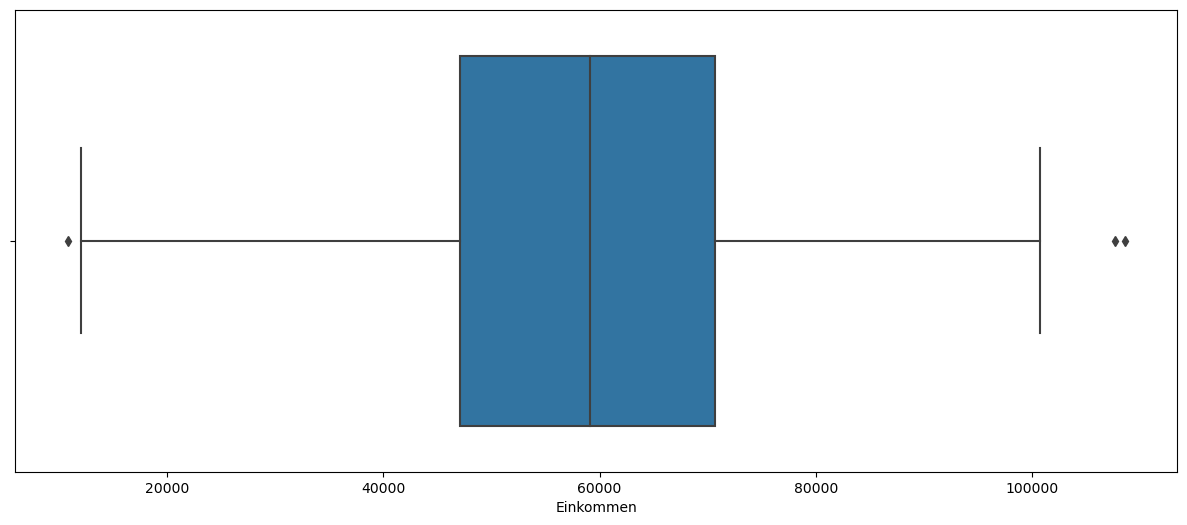

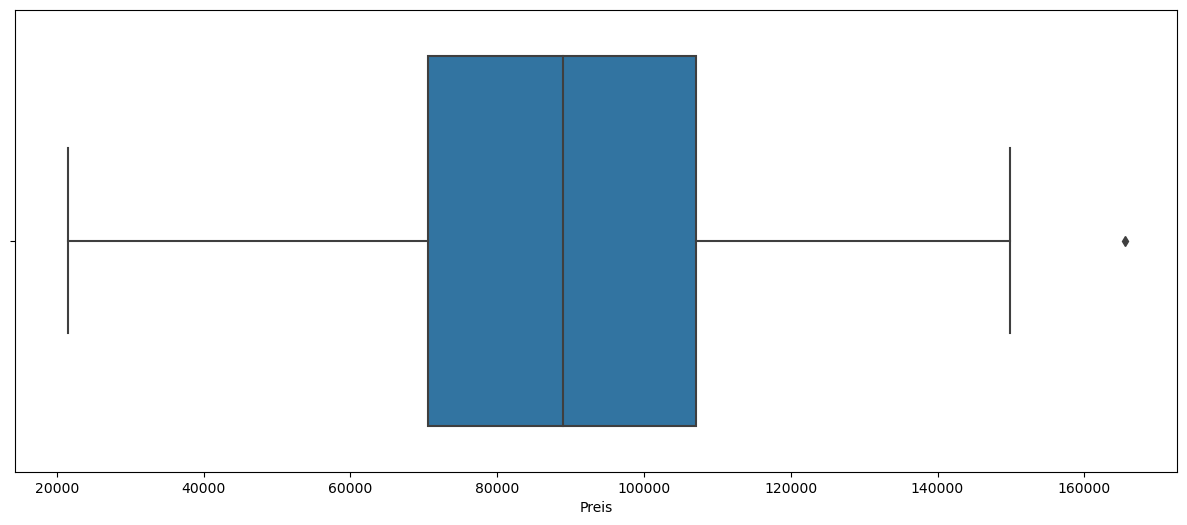

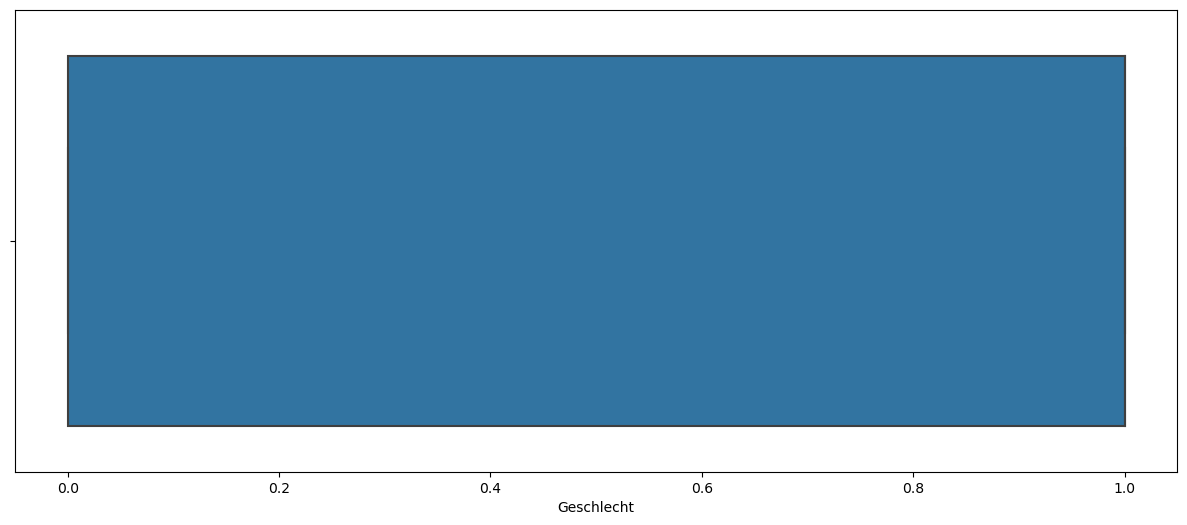

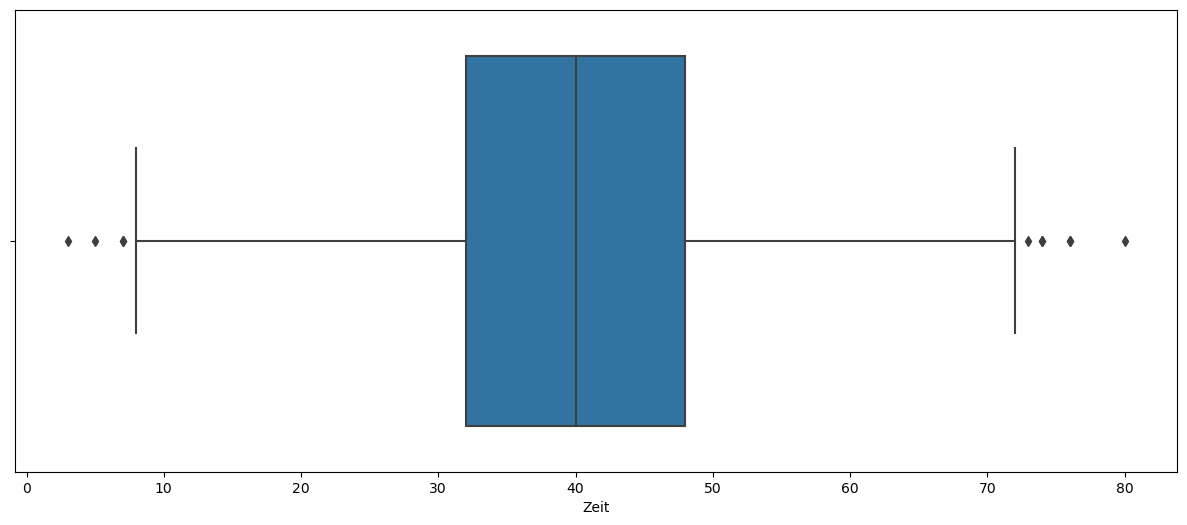

In [55]:
for i in merged_df.select_dtypes(include = "number").columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data=merged_df, x = i)
    plt.show()

# Frage 1: Wie viele Autos wurden verkauft?

In [56]:
# Zöhle die Anzahl der Preise und gebe die Summe wieder
Sales = merged_df["Preis"].count()
Sales

1104

In [57]:
Sales_1 = df_1["Preis"].count()
Sales_1

1104

# Frage 2:  Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [58]:
Hoechstpreis = df_1["Preis"].max()
Mindestpreis = df_1["Preis"].min()
Durchschnittspreis = df_1["Preis"].mean().round(2)

In [59]:
Hoechstpreis

165482.31

In [60]:
Mindestpreis

21471.65

In [61]:
Durchschnittspreis

88975.2

# Frage 3:  Wie hoch war der Gesamtumsatz?


In [62]:
Gesamtumsatz = merged_df["Preis"].sum()
Gesamtumsatz

98228619.38000001

In [63]:
Gesamtumsatz_1 = df_1["Preis"].sum()
Gesamtumsatz_1

98228619.38000001

# Frage 4: Wie viele Autos wurden pro Bundesland verkauft?

In [64]:
# Methode groupby() verwendet, um das DataFrame nach der Spalte "Niederlassung" zu gruppieren
Autos_pro_Bundesland = merged_df.groupby("Niederlassung")["Preis"].count()
Autos_pro_Bundesland

Niederlassung
Baden-Württemberg      205
Bayern                 188
Berlin                 126
Brandenburg             37
Hamburg                 43
Hessen                  96
Niedersachsen           96
Nordrhein-Westfalen    175
Sachsen                 89
Thüringen               49
Name: Preis, dtype: int64

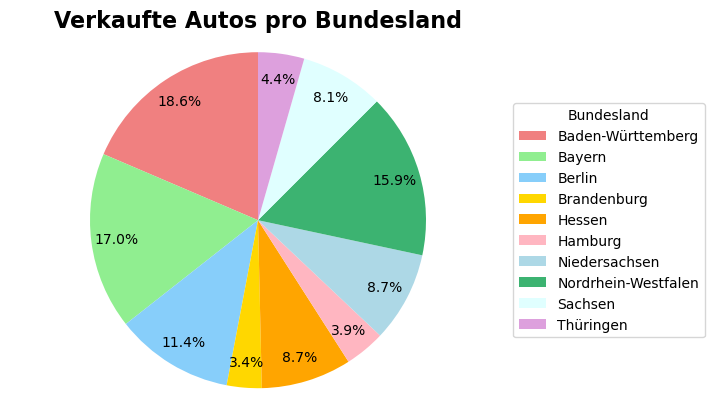

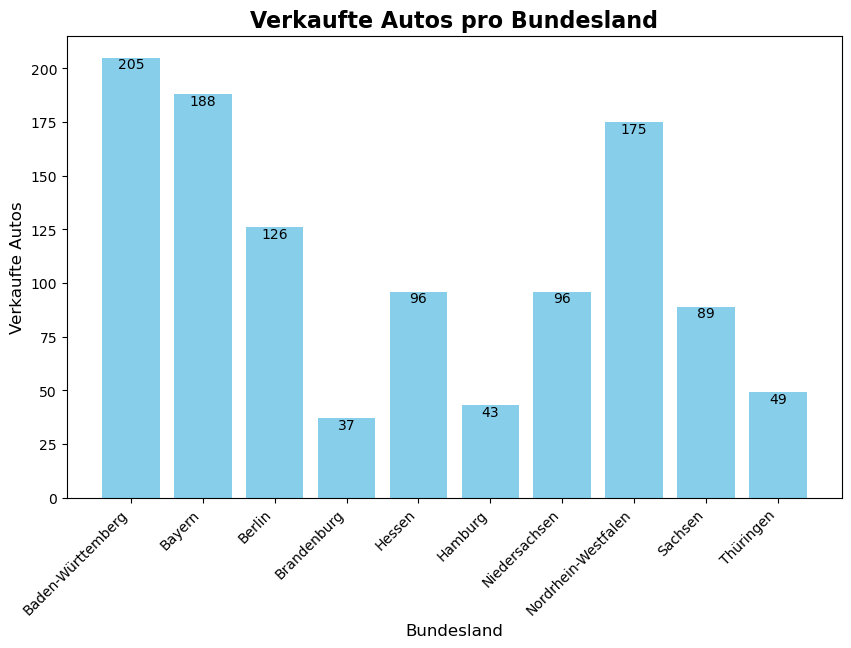

In [65]:
daten = {"Bundesland": ["Baden-Württemberg", "Bayern", "Berlin", "Brandenburg", "Hessen", "Hamburg", "Niedersachsen", "Nordrhein-Westfalen", "Sachsen", "Thüringen"],
        "Verkaufte_Autos": [205, 188, 126, 37, 96, 43, 96, 175, 89, 49]}
df_torte_daten = pd.DataFrame(daten)
farben_palette = ['lightcoral', 'lightgreen', 'lightskyblue', 'gold', 'orange', 'lightpink', 'lightblue', 'mediumseagreen', 'lightcyan', 'plum']

# Tortendiagramm erstellen
plt.pie(df_torte_daten["Verkaufte_Autos"], labels= None, autopct="%1.1f%%", startangle=90, colors=farben_palette, pctdistance = 0.85)

# Hinzufügen von Beschriftungen und Titel
plt.axis("equal")
plt.title("Verkaufte Autos pro Bundesland", fontsize = 16, fontweight= "bold")
plt.legend(df_torte_daten["Bundesland"], title="Bundesland", bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()

#
df_saeule_daten = pd.DataFrame(daten)

# Säulendiagramm erstellen
plt.figure(figsize=(10, 6))
saeulen = plt.bar(df_saeule_daten["Bundesland"], df_saeule_daten["Verkaufte_Autos"], color='skyblue') 

# Absolute Werte über den Säulen anzeigen
for saeule in saeulen:
    height = saeule.get_height()
    plt.text(saeule.get_x() + saeule.get_width() / 2, height, f"{int(height)}", ha="center", va="top", fontsize=10)
#saeule.get_x() + saeule.get_width() / 2: Dieser Ausdruck gibt die x-Position in der Mitte der aktuellen Säule zurück.
#height: Dies ist die Höhe der aktuellen Säule.
# f"{int(height)}": Formatiert die Höhe der Säule als Ganzzahl und erstellt einen Textstring, der die absolute Zahl repräsentiert

# Hinzufügen von Beschriftungen und Titel
plt.xlabel("Bundesland", fontsize=12)
plt.ylabel("Verkaufte Autos", fontsize=12)
plt.title("Verkaufte Autos pro Bundesland", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.show()

# Frage 5:  Wie hoch war der durchschnittliche Umsatz pro Auto pro Bundesland?

In [66]:
# Methode groupby() verwendet, um das DataFrame nach der Spalte "Niederlassung" zu gruppieren
durchschnittsumsatz_pro_bundesland = merged_df.groupby('Niederlassung')['Preis'].mean()
durchschnittsumsatz_pro_bundesland

Niederlassung
Baden-Württemberg      90969.560000
Bayern                 89344.313245
Berlin                 89584.984048
Brandenburg            86673.640811
Hamburg                85549.499070
Hessen                 85864.929479
Niedersachsen          87963.312500
Nordrhein-Westfalen    88633.265200
Sachsen                89455.080674
Thüringen              90816.994082
Name: Preis, dtype: float64

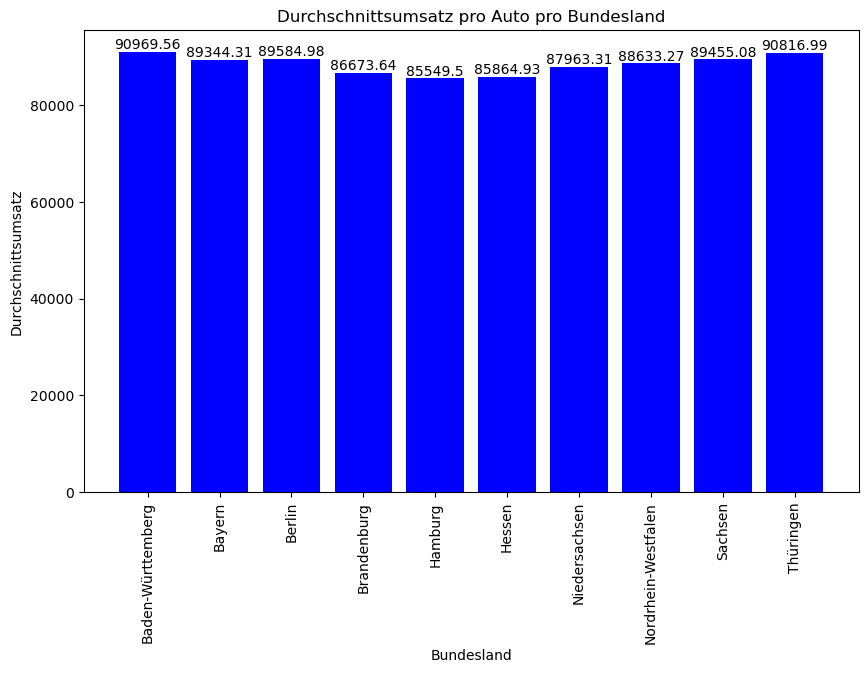

In [67]:
# Plot
plt.figure(figsize=(10, 6))

# Balkendiagramm für durchschnittlichen Umsatz pro Auto pro Bundesland
bars = plt.bar(durchschnittsumsatz_pro_bundesland.index, durchschnittsumsatz_pro_bundesland, color='blue', label='Durchschnittsumsatz')

# Zahlen auf den Säulen anzeigen
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Achsentitel und Legende
plt.title('Durchschnittsumsatz pro Auto pro Bundesland')
plt.xlabel('Bundesland')
plt.ylabel('Durchschnittsumsatz')

# X-Achsenbeschriftungen senkrecht anzeigen lassen
plt.xticks(rotation='vertical')

plt.show()

# Frage 6: Haben mehr Frauen oder mehr Männer unsere Autos gekauft?

In [68]:
Kunden_Verteilung = merged_df[merged_df["Typ"] == "Kunde"].groupby("Geschlecht").size()

if Kunden_Verteilung.get(1, 0) > Kunden_Verteilung.get(0, 0):
    print("Männer machen die Mehrheit der Kunden aus.")
elif Kunden_Verteilung.get(1, 0) > Kunden_Verteilung.get(0, 0):
     print("Frauen machen die Mehrheit der Kunden aus.")   
else:
    print("50 % Männer und 50 % Frauen.")


Männer machen die Mehrheit der Kunden aus.


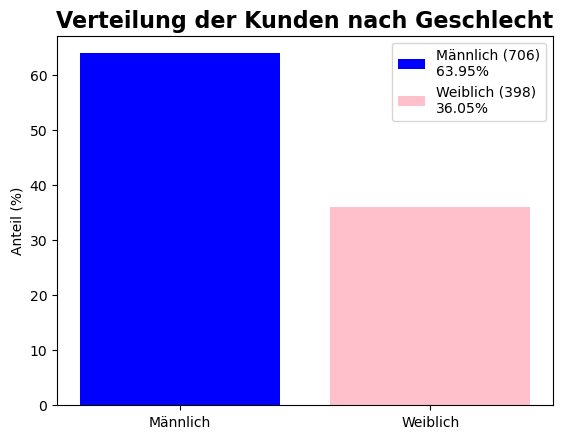

In [69]:
verteilung_nach_geschlecht = merged_df[merged_df["Typ"] == "Kunde"]["Geschlecht"].value_counts(normalize=True) * 100
anzahl_nach_geschlecht = merged_df[merged_df["Typ"] == "Kunde"]["Geschlecht"].value_counts()

# Balkendiagramm erstellen
colors = ["blue", "pink"]
plt.bar(["Männlich"], [verteilung_nach_geschlecht[1]], color="blue", label=f"Männlich ({anzahl_nach_geschlecht[1]})\n{verteilung_nach_geschlecht[1]:.2f}%")
plt.bar(["Weiblich"], [verteilung_nach_geschlecht[0]], color="pink", label=f"Weiblich ({anzahl_nach_geschlecht[0]})\n{verteilung_nach_geschlecht[0]:.2f}%")



plt.title("Verteilung der Kunden nach Geschlecht", fontsize = 16, fontweight= "bold")
plt.ylabel("Anteil (%)")
plt.legend()
plt.show()


In [70]:
Kunden_Verteilung_1 = df_1["Geschlecht"].value_counts()
Kunden_Verteilung_1

Geschlecht
1    706
0    398
Name: count, dtype: int64

# Frage 7: Wie hoch ist das Durchschnittsalter unserer Kunden?

In [71]:
Durchschnittsalter_Kunden = merged_df.loc[merged_df["Typ"] == "Kunde", "Alter"].mean().round(1)
Durchschnittsalter_Kunden

50.4

In [72]:
Durchschnittsalter_Kunden_1 = df_1["Alter"].mean().round(1)
Durchschnittsalter_Kunden_1

50.4

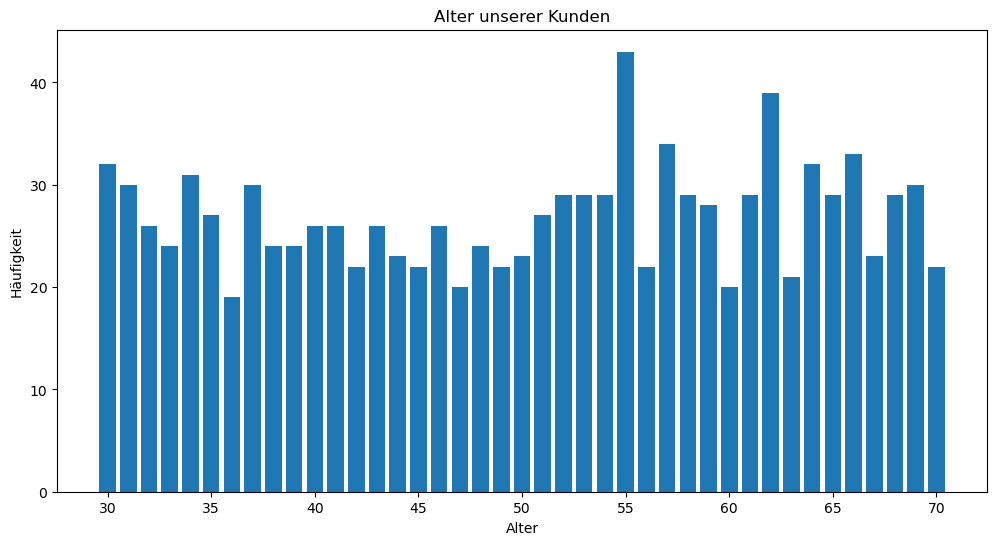

In [73]:
# Häufigkeiten zählen und von klein nach groß sortieren
Haeufigkeiten_sortiert = df_1["Alter"].value_counts().sort_index()

# Diagramm erstellen mit Säulen
plt.figure(figsize=(12, 6))
plt.bar(Haeufigkeiten_sortiert.index, Haeufigkeiten_sortiert)

# Diagramm beschriften
plt.title("Alter unserer Kunden")
plt.xlabel("Alter")
plt.ylabel("Häufigkeit")

# Diagramm anzeigen
plt.show()

# Frage 8:  Wie hoch ist das Durchschnittsalter der Besucher in unseren Showrooms?

In [74]:
Durchschnittsalter_Kunden = merged_df.loc[merged_df["Typ"] == "Besucher", "Alter"].mean().round(1)
Durchschnittsalter_Kunden

49.9

# Frage 9: Durchschnittsalter männliche Kunden

In [75]:
Bedingung = (merged_df["Typ"] == "Kunde") & (merged_df["Geschlecht"] == 1)
Durchschnittsalter_maennlich = merged_df.loc[Bedingung, "Alter"].mean().round(2)
Durchschnittsalter_maennlich

50.47

# Frage 10: Wie hoch ist das Durchschnittseinkommen unserer Kunden?

In [76]:
Durchschnittseinkommen_Kunden = merged_df.loc[merged_df["Typ"] == "Kunde", "Einkommen"].mean().round(2)
Durchschnittseinkommen_Kunden

58895.0

In [77]:
Durchschnittseinkommen_Kunden = df_1["Einkommen"].mean().round(2)
Durchschnittseinkommen_Kunden

58895.0

# Frage 11: Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit? (nur für die Kunden)

In [78]:
df_11 = df_1[["Alter", "Einkommen", "Preis", "Zeit"]]

In [79]:
df_11.corr()

,Alter,Einkommen,Preis,Zeit
Alter,1.000000,0.762055,0.780937,0.589595
Einkommen,0.762055,1.000000,0.896557,0.776198
Preis,0.780937,0.896557,1.000000,0.707778
Zeit,0.589595,0.776198,0.707778,1.000000


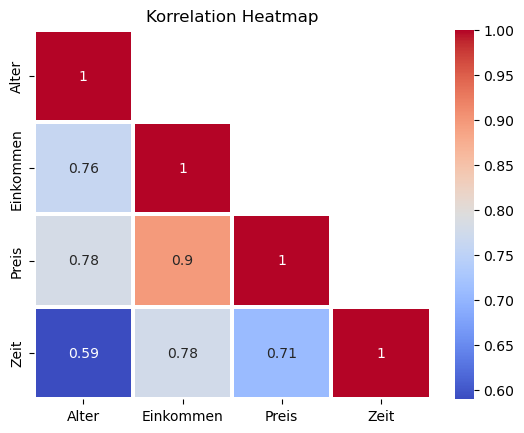

In [80]:
sns.heatmap(df_11.corr(), annot = True, cmap = "coolwarm", mask=np.triu(df_11.corr(),+1),linewidth=1.5)
plt.title("Korrelation Heatmap")
plt.show()

# Frage 12:  Wie ist die Variable Zeit verteilt? (Kunden und Besucher zusammen)


In [81]:
print("Statistische Informationen zur Variable 'Zeit':")
print(merged_df["Zeit"].describe())

Statistische Informationen zur Variable 'Zeit':
count    1995.000000
mean       40.262657
std        11.621591
min         3.000000
25%        32.000000
50%        40.000000
75%        48.000000
max        80.000000
Name: Zeit, dtype: float64


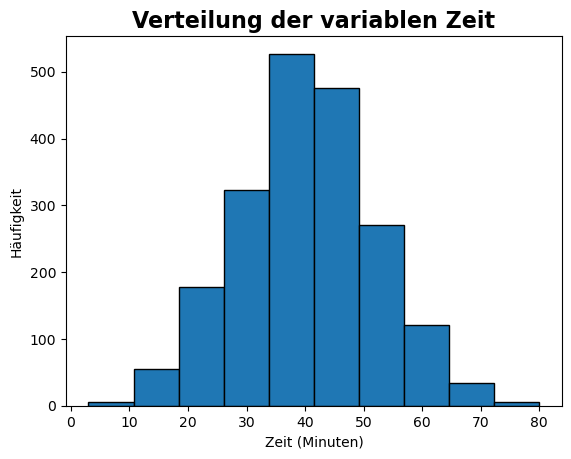

In [82]:
x1 = plt.hist(merged_df["Zeit"], bins=10, edgecolor="black")
plt.title("Verteilung der variablen Zeit", fontsize = 16, fontweight= "bold")
plt.ylabel("Anteil (%)")
plt.xlabel("Zeit (Minuten)")
plt.ylabel("Häufigkeit")
plt.show()


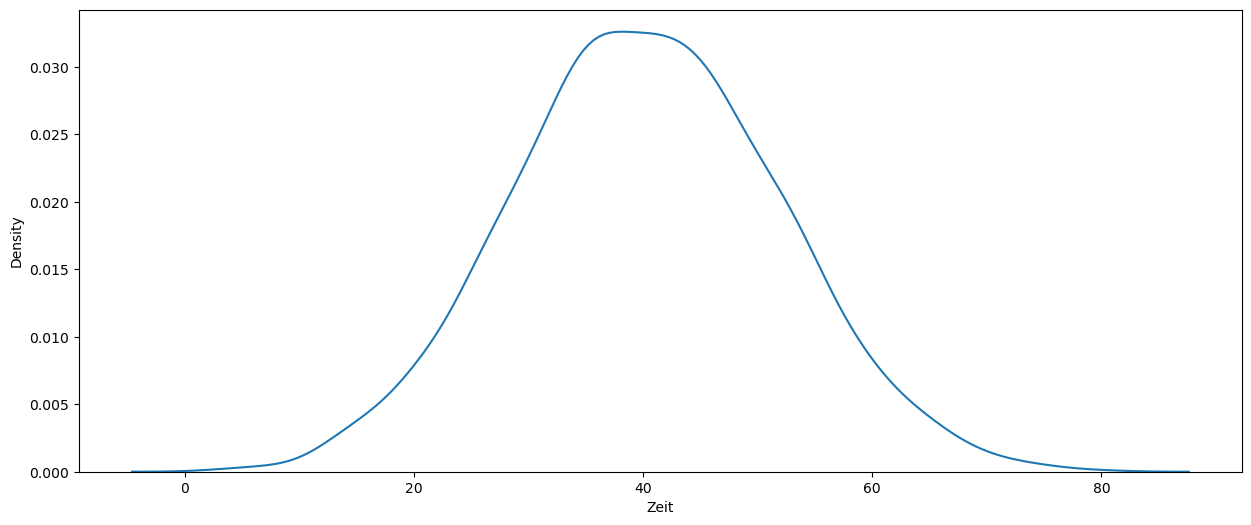

In [83]:
column_to_plot = "Zeit"

plt.figure(figsize=(15, 6))
sns.kdeplot(data=merged_df, x=column_to_plot)
plt.show()

# Frage 13: Wie viele Kunden haben keinen Kredit bei der Bank genommen?

In [84]:
Kunden_ohne_Kredit_1 = df_1[df_1["Einkommen"] > df_1["Preis"]].shape[0]
Kunden_ohne_Kredit_1

5

In [85]:
# Kunden Jahreseinkommen > Autopreis = kein Bankkredit 
Kunden_ohne_Kredit = merged_df.loc[merged_df["Einkommen"] > merged_df["Preis"]].shape[0]
Kunden_ohne_Kredit

5

In [86]:
# Anzeigen der Kunden, die keinen Kredit genommen haben
merged_df.loc[merged_df["Einkommen"] > merged_df["Preis"]]

,Typ,Alter,Einkommen,Preis,Geschlecht,Zeit,Niederlassung
KundeNR,,,,,,,
K0175,Kunde,32,50330.0,49540.28,1,27.0,Bayern
K0859,Kunde,34,24264.0,22580.44,1,19.0,Berlin
K0364,Kunde,37,54403.0,53690.36,0,47.0,Brandenburg
K0447,Kunde,32,30856.0,27934.83,1,18.0,Nordrhein-Westfalen
K0143,Kunde,31,36296.0,35482.61,0,31.0,Nordrhein-Westfalen


# Frage 14: Welches sind die sozioökonomischen Merkmale der Kunden, die den Kaufpreis beeinflussen? 


In [87]:
# Fehlende Werte überprüfen
merged_df.isnull().sum()

Typ                0
Alter              0
Einkommen          0
Preis            891
Geschlecht         0
Zeit               0
Niederlassung      0
dtype: int64

In [94]:
# DataFrame mit relevanten Spalten
df_selected = merged_df[['Preis', 'Alter', 'Einkommen', 'Geschlecht']]

# Zeilen ohne Werte entfernen
df_selected = df_selected.dropna()

In [101]:
# unabhängigen Variablen X und abhängige Variable y
X = df_selected[['Alter', 'Einkommen', 'Geschlecht']]
y = df_selected['Preis']

# Konstanter Term (intercept)
X = sm.add_constant(X)

# Modell erstellen
model = sm.OLS(y, X).fit()

# Regressionsergebnisse
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     571.7
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          5.71e-268
Time:                        13:42:55   Log-Likelihood:                -21779.
No. Observations:                1995   AIC:                         4.357e+04
Df Residuals:                    1991   BIC:                         4.359e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.014e+04   1356.498     29.591      0.000    3.75e+04    4.28e+04
Alter        210.6763     40.832      5.160      0.000     130.599     290.754
Einkommen      0.6278      0.030     21.106      0.000       0.569       0.686
Geschlecht  1895.1066    613.261      3.090      0.002     692.406    3097.807
==============================================================================
Omnibus:                       16.654   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.400
Skew:                          -0.026   Prob(JB):                      0.00335
Kurtosis:                       2.633   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Alter, Einkommen und Geschlecht sind die sozioökonomischen Merkmale

# Frage 15: Prognostiziere den Kaufpreis für(m, 32, 30000) & (m, 51, 54000)

# Frage 16: Welche Variable (Ursache) beeinflusst den Preis (Wirkung) des Autos am meisten?

In [ ]:
df_16 = df_1[["Alter", "Einkommen", "Geschlecht", "Preis"]]

In [ ]:
# Standardisierung vornehmen 
df_z = df_16.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

In [ ]:
# Regression
formel = 'Preis ~ Alter + Einkommen + Geschlecht' 
result = smf.ols(formel, data=df_z).fit()

In [ ]:
# Betas anzeigen lassen
round(result.params, 6)

In [ ]:
result.summary()

Einkommen hat das größte Beta [0;1] und beeinflusst daher den Preis des Autos am meisten

# Frage 17: Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt.

In [107]:
# Index 'Kauf' auf Basis des Index 'Typ'
merged_df['Kauf'] = merged_df['Typ'].apply(lambda x: True if x == 'Kunde' else False)
merged_df

,Typ,Alter,Einkommen,Preis,Geschlecht,Zeit,Niederlassung,Kauf
KundeNR,,,,,,,,
K0310,Kunde,64,66894.00,88160.310000,1,43.0,Bayern,True
K1042,Kunde,54,77644.00,103145.700000,1,40.0,Berlin,True
K0382,Kunde,55,44341.00,80565.160000,0,37.0,Baden-Württemberg,True
K0498,Kunde,49,67271.00,83949.890000,0,42.0,Bayern,True
K0552,Kunde,46,49832.00,93781.580000,0,41.0,Hessen,True
...,...,...,...,...,...,...,...,...
K1211,Besucher,32,34391.82,88975.198714,1,48.0,Hessen,False
K1375,Besucher,41,68516.50,88975.198714,0,34.0,Sachsen,False
K1965,Besucher,65,89685.33,88975.198714,0,23.0,Bayern,False


In [112]:
# Fehlende Werte überprüfen
merged_df.isnull().sum()

Typ              0
Alter            0
Einkommen        0
Preis            0
Geschlecht       0
Zeit             0
Niederlassung    0
Kauf             0
dtype: int64

In [121]:
# Relevante Spalten
df_selected1 = merged_df[['Kauf', 'Typ', 'Alter', 'Einkommen', 'Preis', 'Geschlecht', 'Zeit', 'Niederlassung']]

# unabhängigen Variablen X und abhängige Variable y
X = df_selected1.drop('Kauf', axis=1)
y = df_selected1['Kauf']

# Konstanter Term (intercept)
X = sm.add_constant(X)

# Modell erstellen
model = sm.Logit(y, X).fit()

# Regressionsergebnisse
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# Frage 18: Wie hoch ist die Wahrscheinlichkeit, dass Autokauf zustande kommt bei: (m, 32y, 30000€, 30min) & (m, 51y, 54000€, 45min)

# Frage 19: Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen?

Problem 1: Es fehlen Daten

In [ ]:
#CSV Kunden

#Alter         0
#Einkommen     0
#Preis         0
#Geschlecht    5
#Zeit          0
#KundeNr       0

Problem 2: Behandlung fehlender Daten und Ausreißern

Spalte "Geschlecht" --> 5 fehlende Werte

In [ ]:
# df_1["Geschlecht"] = df_1["Geschlecht"].fillna(1) # Für 1 (Männlich) entschieden, da die meisten Ausprägungen 1 waren

Spalte "Einkommen" --> Positive/Negative Ausreißer und Wert von 0

In [ ]:
#df_1["Einkommen"].mean() --> 964474.8175955408 NICHT GEEIGNET; Mittelwert sehr empfindlich ggü. Ausreißern

In [ ]:
#df_1["Einkommen"].median() --> 59013; Median ist robuster ggü. Ausreißern

In [ ]:
#df_1["Einkommen"] = df_1["Einkommen"].apply(lambda x: median_einkommen if x <= 0 or x >= 1000000 else x)

Spalte "Alter" --> Werte von 100 und 120

In [ ]:
#df_1["Alter"].value_counts()


In [ ]:
#Alter
#55     41
#62     39
#57     34
#66     33
#64     32
#30     32
#34     31
#69     30
#37     30
#31     30
#52     29
#54     29
#58     29
#65     29
#53     29
#61     29
#68     29
#59     28
#35     27
#51     27
#41     26
#40     26
#43     26
#32     26
#46     26
#39     24
#48     24
#38     24
#33     24
#44     23
#50     23
#67     23
#42     22
#70     22
#56     22
#45     22
#49     22
#63     21
#60     20
#47     20
#36     19
#100     1
#120     1

Klare Tendenz, dass bestimmte Altersgruppen besonders häufig auftreten --> deutliche Dominanz einer Altersgruppe erkennbar 

Daher Entschedung für Modus und gegen Median

In [ ]:
#df_1["Alter"].mode()[0]

In [ ]:
#df_1["Alter"] = df_1["Alter"].apply(lambda x: modalwert_alter if x >= 100 else x)

Problem 3: Die Datentypen sind unterschiedlich

In [ ]:
#Datentyp CSV Kunden:

#Alter           int64
#Einkommen     float64
#Preis         float64
#Geschlecht    float64
#Zeit          float64
#KundeNr        object

In [ ]:
#Datentyp CSV Besucher:

#Alter          int64
#Einkommen     object
#Geschlecht     int64
#Zeit          object
#KundeNr       object

Probleme: Datenverlust, Unerwartetes Verhalten

Sicherstellen, dass die Datentypen in den gemeinsamen Spalten zwischen den beiden CSV-Dateien konsistent sind

In [ ]:
#df_1["Geschlecht"] = df_1["Geschlecht"].astype("int64")

In [ ]:
#Datentyp CSV Kunden:

#Alter           int64
#Einkommen     float64
#Preis         float64
#Geschlecht      int64
#Zeit          float64
#KundeNr        object

In [ ]:
#df_2["Einkommen"] = pd.to_numeric(df_2["Einkommen"].str.replace(',', '.'), errors="coerce")

"coerce": anstelle einer Fehlermeldung wird der Wert NaNfür diejenigen Elemente verwendet
die nicht erfolgreich in numerische Werte umgewandelt werden können

In [ ]:
#df_2["Zeit"] = pd.to_numeric(df_2["Zeit"].str.replace(',', '.'), errors="coerce")

In [ ]:
#Datentyp CSV Besucher:

#Alter           int64
#Einkommen     float64
#Geschlecht      int64
#Zeit          float64
#KundeNr        object

Problem 4: Bundesländer nicht einheitlich --> falsche Schreibweise, Stadt, Bezirk

In [ ]:
#merged_df["Niederlassung"].unique()

In [ ]:
#array(['Bayern', 'Berlin', 'Baden-Württemberg', 'Hessen', 'Thüringen',
#       'Sachsen', 'Nordrhein-Westfalen', 'BERLIN', 'Niedersachsen',
#       'Hamburg', 'Brandenburg', 'Berlin-Mitte', 'Düsseldorf', 'NRW',
#       'Berlin-Charlottenburg'], dtype=object)

Zu beheben sind: BERLIN,NRW, Düsseldorf, Berlin-Mitte, Berlin-Charlottenburg

In [ ]:
#merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("BERLIN", "Berlin")
#merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("Berlin-Mitte", "Berlin")
#merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("Berlin-Charlottenburg", "Berlin")
#merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("Düsseldorf", "Nordrhein-Westfalen")
#merged_df["Niederlassung"] = merged_df["Niederlassung"].replace("NRW", "Nordrhein-Westfalen")

In [ ]:
#merged_df["Niederlassung"].unique()

In [ ]:
#array(['Bayern', 'Berlin', 'Baden-Württemberg', 'Hessen', 'Thüringen',
#       'Sachsen', 'Nordrhein-Westfalen', 'Niedersachsen', 'Hamburg',
#      'Brandenburg'], dtype=object)

# Frage 20: Welche zusätzlichen Informationen sollten gesammelt werden?

Vorschlag 1:

Vorschlag 2: